<AxesSubplot:>

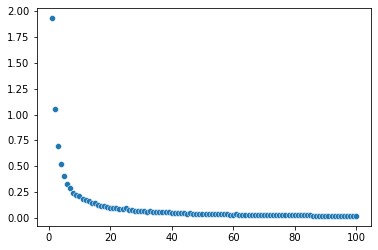

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

n_samples = 1000
variance = np.zeros(100)
for i in range(1, 101):
    samples = np.random.randint(1, 6, size=(n_samples, i))
    mean = np.mean(samples, axis=1)
    variance[i-1] = np.var(mean)

sns.scatterplot(np.arange(1, 101), variance)

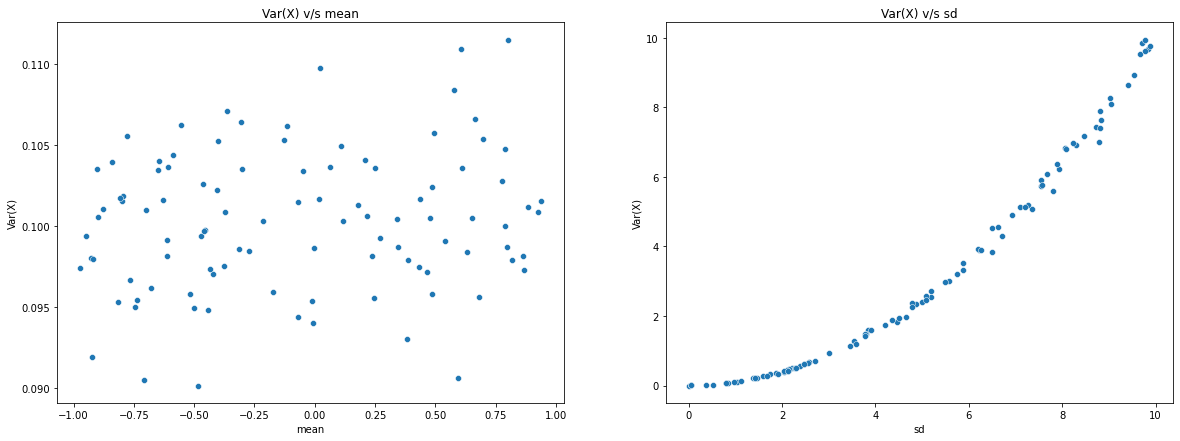

In [3]:
size = 100

variance_variable_mean = np.zeros(size+1)
variance_variable_sd = np.zeros(size+1)

var_mean_range = np.random.uniform(-1, 1, size+1)
var_sd_range = np.random.uniform(0, 10, size+1)

for id, i in enumerate(var_mean_range):
    # samples for variable mean and fixed sd
    samples_variable_mean = np.random.normal(loc=i, scale=1.0, size=(1000, 10))
    mean_variable_mean = np.mean(samples_variable_mean, axis=1)
    variance_variable_mean[id] = np.var(mean_variable_mean)

for id, i in enumerate(var_sd_range):
    # samples for fixed mean and variable sd
    samples_variable_sd = np.random.normal(loc=0.0, scale=i, size=(1000, 10))
    mean_variable_sd = np.mean(samples_variable_sd, axis=1)
    variance_variable_sd[id] = np.var(mean_variable_sd)

fig, axs = plt.subplots(figsize=(20, 7), ncols=2)

sns.scatterplot(var_mean_range, variance_variable_mean, ax=axs[0])
axs[0].title.set_text('Var(X) v/s mean')
axs[0].set_xlabel('mean')
axs[0].set_ylabel('Var(X)')

sns.scatterplot(var_sd_range, variance_variable_sd, ax=axs[1])
axs[1].title.set_text('Var(X) v/s sd')
axs[1].set_xlabel('sd')
axs[1].set_ylabel('Var(X)')

fig.show()

In [4]:
from scipy.stats import norm
from math import sqrt

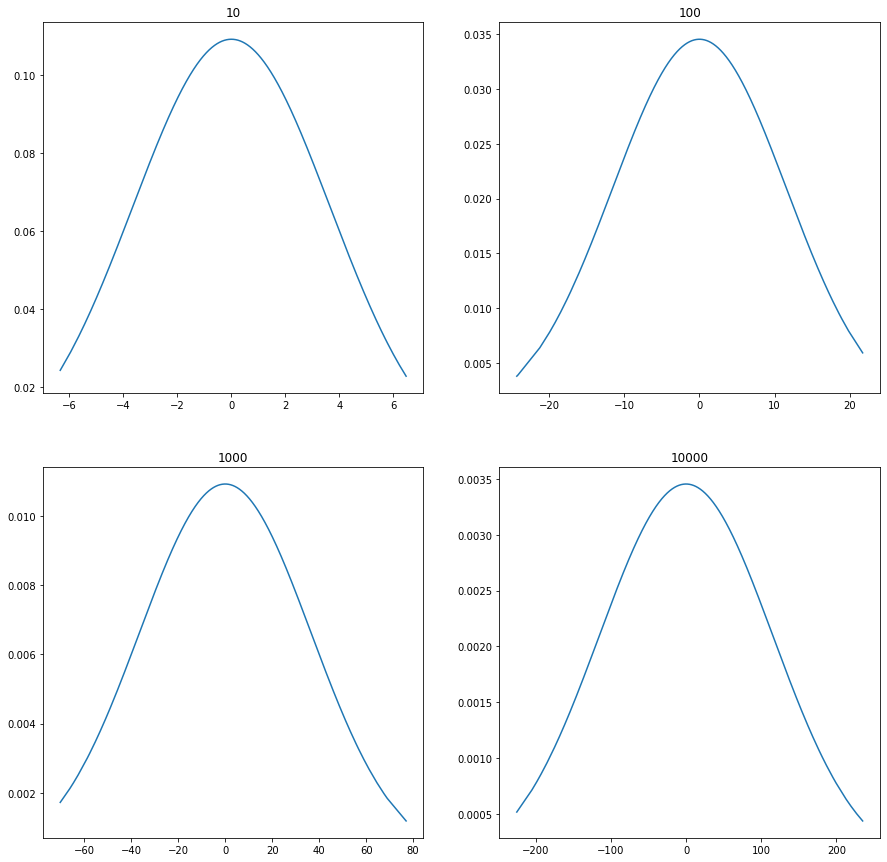

In [5]:
n = np.array([10, 100, 1000, 10000])
D_sum = np.empty(shape=(0, 0))

for size_idx in np.arange(n.shape[0]):
    D = np.random.uniform(-1, 1, size=(10000, n[size_idx]))
    if size_idx == 0:
        D_sum = np.sum(D, axis=1)
    else:
        D_sum = np.vstack([D_sum, np.sum(D, axis=1)])    

fig, axs = plt.subplots(figsize=(15, 15), nrows=2, ncols=2)
counter = 0
for i in np.arange(2):
    for j in np.arange(2):
        sns.lineplot(x=D_sum[counter,:], y=norm.pdf(D_sum[counter,:], (n[counter]*(-2+2)/2), (sqrt( ( (-2-2)**2)/12) )*sqrt(n[counter])), ax=axs[i, j])
        axs[i, j].set_title(f'{n[counter]}')
        counter += 1

# Chi Square test

### Using dice throw example (Discrete sample example)

#### We know that the population mean of dice throws will be:
### $\frac{\sum_{i=1}^6 i}{6}$
Hence, $\mu$ = 3.5

#### We also know that Standard Deviation will be:
### $\sqrt{\frac{\sum_{i=1}^6(x_i - \mu)}{6-1}}$
Hence, $\sigma$ = 1.707825127659933

In [6]:
pop_mean = 3.5
pop_std = 1.707825127659933
pop_var = pop_std**2

In [7]:
samples = np.random.randint(1, 6+1, size=(1000, 3))
print(samples[:10])
samples.shape

[[4 2 3]
 [3 4 2]
 [2 3 1]
 [3 6 6]
 [1 1 5]
 [4 1 1]
 [2 4 3]
 [5 6 5]
 [1 6 1]
 [3 3 1]]


(1000, 3)

In [8]:
sample_mean_dist = np.mean(samples, axis=1)
sample_var_dist = np.var(samples, axis=1)
sample_std_dist = sample_var_dist**0.5

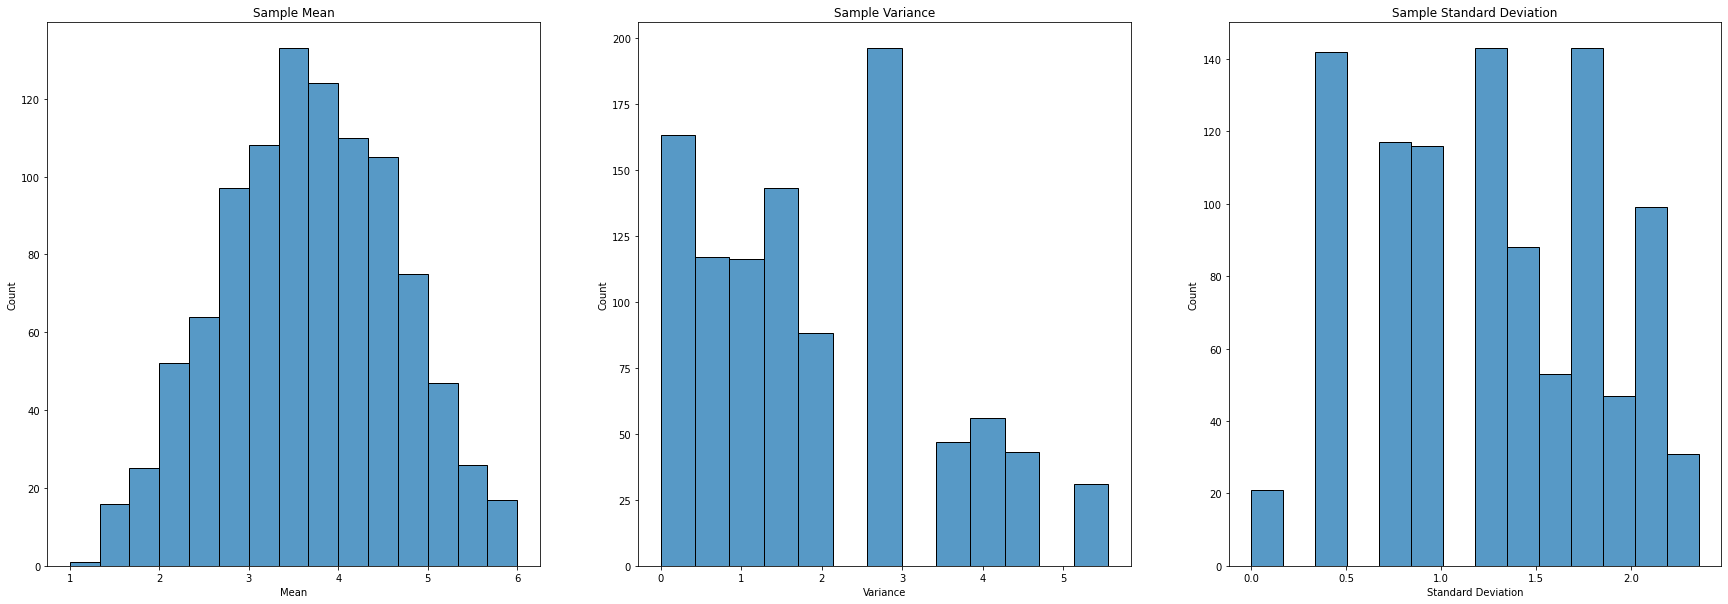

In [9]:
%matplotlib inline
fig, axs = plt.subplots(figsize=(30, 10), ncols=3)
sns.histplot(x=sample_mean_dist, ax=axs[0])
axs[0].set_title('Sample Mean')
axs[0].set_xlabel('Mean')
sns.histplot(x=sample_var_dist, ax=axs[1])
axs[1].set_title('Sample Variance')
axs[1].set_xlabel('Variance')
sns.histplot(x=sample_std_dist, ax=axs[2])
axs[2].set_title('Sample Standard Deviation')
axs[2].set_xlabel('Standard Deviation');

From *Central Limit Theorem*, we already knew that the sample means distribution will be a **Normal Distribution**
<br>Now, We have to gain insights about the ***sample variance distribution*** 
<br><br>
#### But, first lets see the whether the below given relation  holds or not: 
$E[S^2] = \sigma^2$

In [10]:
expected_sample_variance = np.mean(sample_var_dist)
expected_sample_variance

1.942

In [11]:
pop_var

2.9166666666666665

Now, lets look at at the observations:
* $\sigma^2$ - $E[S^2]$ > 0
* $E[S^2]$ < $\sigma^2$

<br>But,we cannot say for sure since we tried this using only 1000 samples.<br>Let's, try this using $10^6$ samples.

In [12]:
large_samples = np.random.randint(1, 6+1, size=(10**6, 3))
print(large_samples[:10])
large_samples.shape 

[[2 6 1]
 [5 5 3]
 [4 4 5]
 [3 5 3]
 [5 6 5]
 [1 1 5]
 [5 2 4]
 [3 1 3]
 [2 2 6]
 [5 6 2]]


(1000000, 3)

In [13]:
large_sample_mean_dist = np.mean(large_samples, axis=1)
large_sample_var_dist = np.var(large_samples, axis=1)
large_sample_std_dist = large_sample_var_dist**0.5

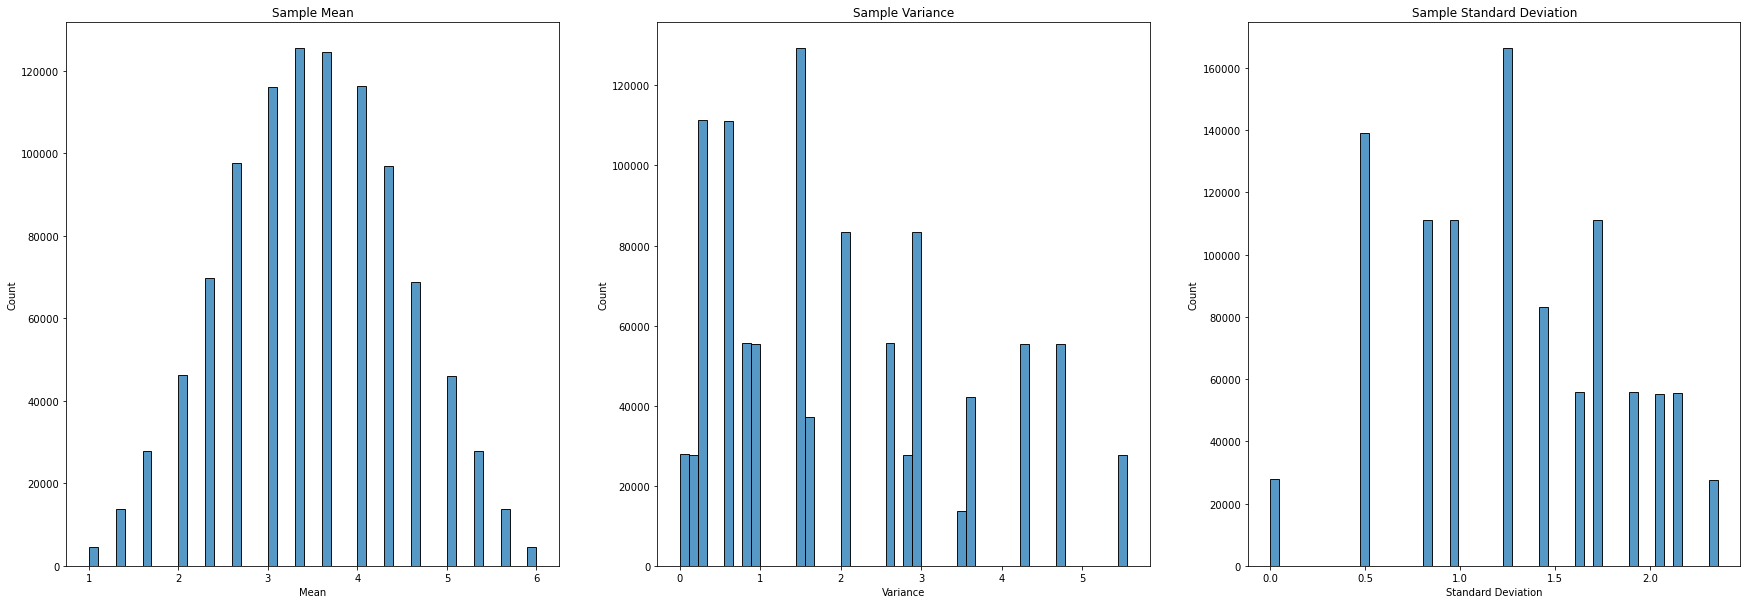

In [14]:
%matplotlib inline
fig, axs = plt.subplots(figsize=(30, 10), ncols=3)
sns.histplot(x=large_sample_mean_dist, ax=axs[0], bins=50)
axs[0].set_title('Sample Mean')
axs[0].set_xlabel('Mean')
sns.histplot(x=large_sample_var_dist, ax=axs[1], bins=50)
axs[1].set_title('Sample Variance')
axs[1].set_xlabel('Variance')
sns.histplot(x=large_sample_std_dist, ax=axs[2], bins=50)
axs[2].set_title('Sample Standard Deviation')
axs[2].set_xlabel('Standard Deviation');

In [15]:
expected_large_sample_var = np.mean(large_sample_var_dist)
expected_large_sample_var

1.9435353333333332

As we can see, there is very slight change in $E(S^2)$. Hence, our previous observations stands true.
* $\sigma^2$ - $E[S^2]$ > 0
* $E[S^2]$ < $\sigma^2$

### Random samples from standard normal dist. (Continous sample example) 

Since, it is a standard normal distribution, we know that:
<br>
$\mu=0$
<br>
$\sigma=1$

In [16]:
norm_samples = np.random.normal(size=(10**6, 3))
print(norm_samples[:10])
norm_samples.shape

[[-1.59755836  0.6052438   0.15816063]
 [-0.58498944  0.88672317  0.45412281]
 [ 0.23345614 -1.08590959 -0.31579325]
 [-1.28656105 -1.49891636  0.33864635]
 [-2.69687999  1.70794357  1.09421669]
 [-0.60918815 -1.18747582 -0.75426011]
 [ 0.98204633  0.6292248   0.33586079]
 [ 1.20727961 -0.57643526  0.89584157]
 [-0.63762806 -0.68572883 -0.51300426]
 [ 0.50739046 -1.88040403  1.30396801]]


(1000000, 3)

In [17]:
norm_sample_mean_dist = np.mean(norm_samples, axis=1)
norm_sample_var_dist = np.var(norm_samples, axis=1)
norm_sample_std_dist = norm_sample_var_dist**0.5

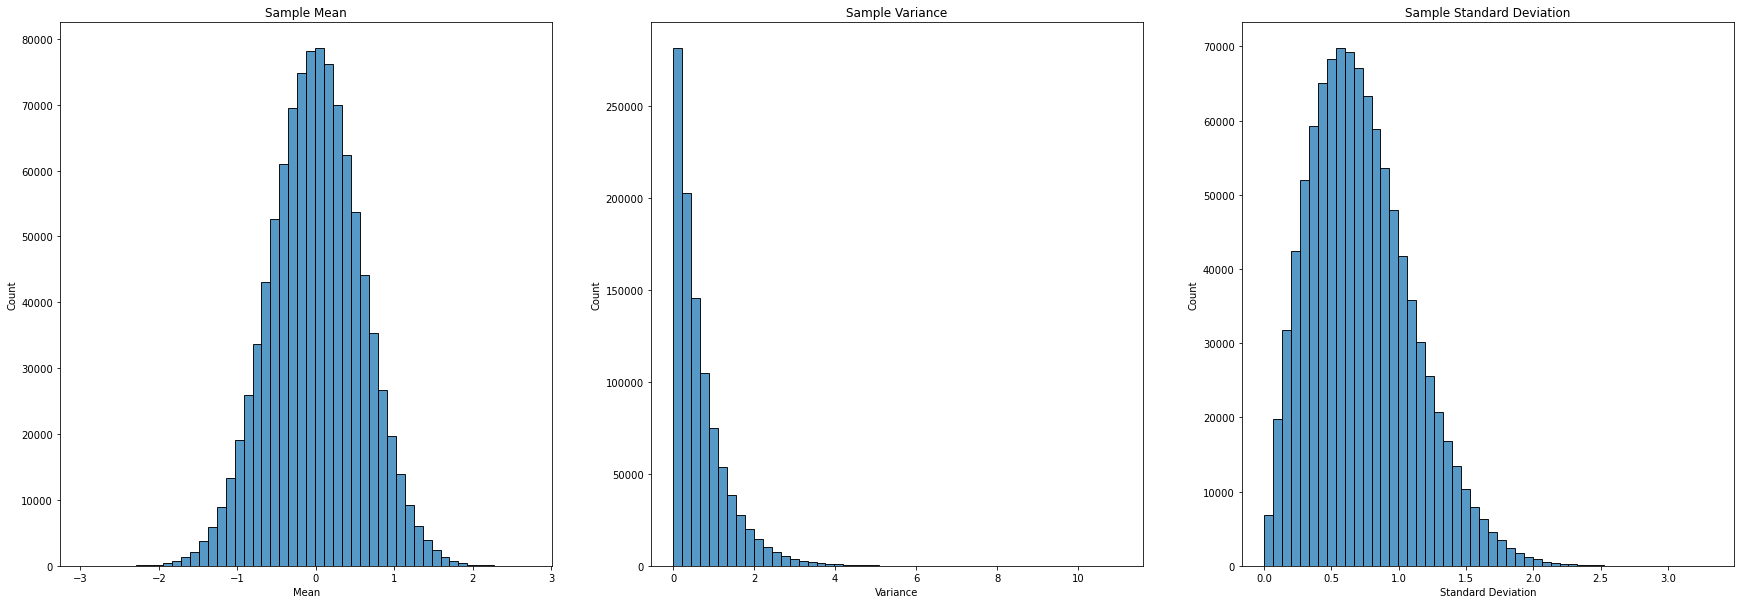

In [18]:
%matplotlib inline
fig, axs = plt.subplots(figsize=(30, 10), ncols=3)
sns.histplot(x=norm_sample_mean_dist, ax=axs[0], bins=50)
axs[0].set_title('Sample Mean')
axs[0].set_xlabel('Mean')
sns.histplot(x=norm_sample_var_dist, ax=axs[1], bins=50)
axs[1].set_title('Sample Variance')
axs[1].set_xlabel('Variance');
sns.histplot(x=norm_sample_std_dist, ax=axs[2], bins=50)
axs[2].set_title('Sample Standard Deviation')
axs[2].set_xlabel('Standard Deviation');


In [19]:
expected_norm_sample_var = np.mean(norm_sample_var_dist)
expected_norm_sample_var

0.6683163484182426

#### Even while using normal distribution we can see that the oberservations made using samples containing discrete values hold true:
* $\sigma^2$ - $E[S^2]$ > 0
* $E[S^2]$ < $\sigma^2$ 

### Now, lets play with two value:
* $n$ = sample size
* $\mu$ = population mean

We will plot a graph for each $v/s$ $E(S^2)$
<br>
and compare with $\sigma^2$

### For $n$:
* $\mu$ = 0
* $\sigma$ = 1

In [20]:
import pandas as pd

In [21]:
variable_n = np.arange(1, 50)
variable_n

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [22]:
variable_n_expected_var_series = pd.Series(index=variable_n)

In [23]:
for n in variable_n:
    variable_n_samples = np.random.normal(size=(10**6, n))
    variable_n_var_dist = np.var(variable_n_samples, axis=1)
    variable_n_expected_var_series[n] = np.mean(variable_n_var_dist)

variable_n_expected_var_series.iloc[:5]

1    0.000000
2    0.499442
3    0.665480
4    0.750368
5    0.800962
dtype: float64

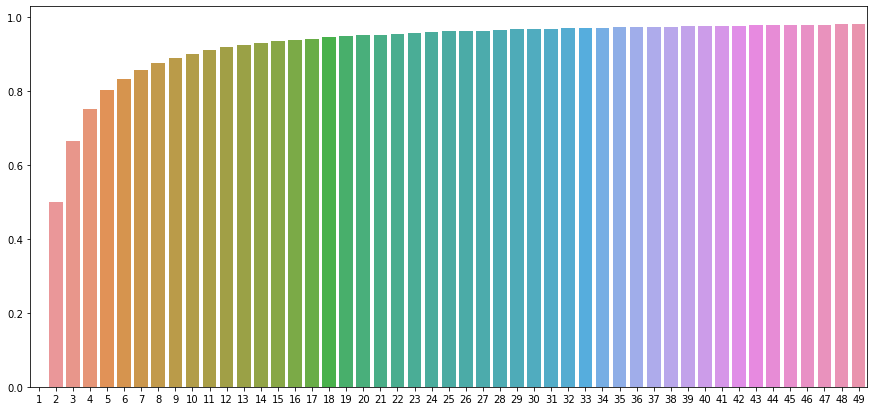

In [24]:
fig, axs = plt.subplots(figsize=(15, 7))
sns.barplot(x=variable_n, y=variable_n_expected_var_series.values);

We can see that as we increase $n$, $E(S^2)$ is getting closer to $\sigma^2$ which is equal to 1.

### For $\mu$:
* $n$ = 3
* $\sigma$ = 1

In [25]:
n = 3

In [26]:
variable_mean = np.random.uniform(-10, 10+1, size=50)
variable_mean

array([-1.80275011,  0.9889128 ,  5.50973802,  8.94468732,  9.99485451,
       -8.1479791 ,  2.0428772 , 10.15112149, -6.73407953, -4.15543667,
       -4.66169479,  2.0989874 ,  7.78171544, -5.87960934, -0.58761096,
       10.08736147, -1.01736911,  1.47426896,  6.83054673, -3.64442481,
        7.39023097, -0.27539419,  9.53581927, -7.41506544,  7.09386316,
        5.13691396,  6.07511271,  5.2345292 , -4.07392626, -9.07724784,
       -0.04271549, 10.42169392, -2.77416852, -8.37026899, -8.33100788,
        8.37366426,  3.59052258,  3.7588328 ,  8.63797868,  0.04803319,
        2.83387308,  8.15862314,  5.05447535,  4.76974311,  1.06521211,
        9.16891568, -8.06298092, -5.22532286, -7.18463535, -0.8625423 ])

In [27]:
variable_mean_expected_var_series = pd.Series(index=variable_mean)

In [28]:
for mean in variable_mean:
    variable_mean_samples = np.random.normal(loc=mean, size=(10**6, n))
    variable_mean_var_dist = np.var(variable_mean_samples, axis=1)
    variable_mean_expected_var_series[mean] = np.mean(variable_mean_var_dist)

variable_mean_expected_var_series.iloc[:5]

-1.802750    0.666482
 0.988913    0.666517
 5.509738    0.666405
 8.944687    0.667070
 9.994855    0.666480
dtype: float64

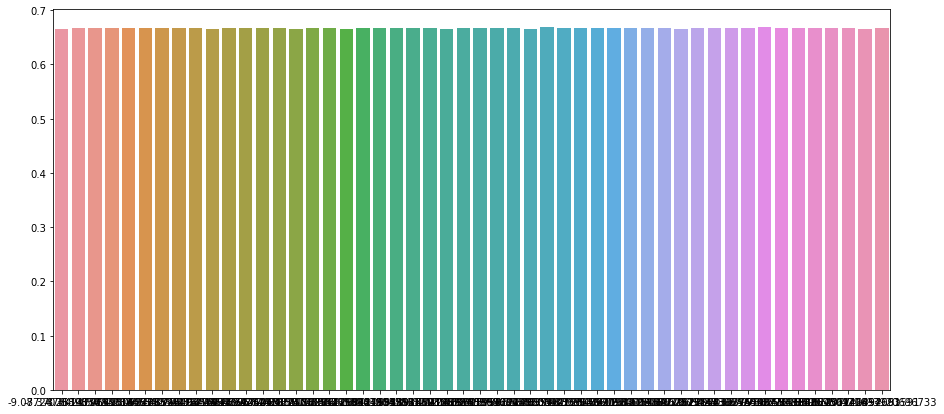

In [29]:
fig, axs = plt.subplots(figsize=(15, 7))
sns.barplot(x=variable_mean, y=variable_mean_expected_var_series.values);

The barplot for all  $\mu$ is showing approx. 1, so $\mu$ does not affect $E(S^2).
<br>
Let's zoom in on the data using lineplot.

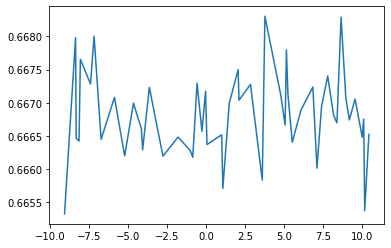

In [30]:
sns.lineplot(x=variable_mean, y=variable_mean_expected_var_series.values);

We can see from the lineplot that value of $E(S^2)$ lies in the interval $(0.979, 0.981)$, which is very very close to 1.

### Conclusions from above two plots:

* As $n$&#8593; $,$ $E(S^2)$ &#8594; 1
* $\mu$ has no effect on $E(S^2)$